In [14]:
import json.decoder
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
def timit(func):
    def wrapper(*args, **kwargs):
        print("Start")
        st = time.time()
        func(*args, **kwargs)
        print("End in " + str(time.time() - st) + "s")

    return wrapper

In [16]:
def main():
    dir = os.listdir("Data")
    tab = []
    for file in dir:
        if not file.endswith(".txt"):
            continue
        with open("Data/" + file, 'r') as f:
            lines = f.readlines()
            nbOp = 0
            if len(lines) == 0:
                print("Empty file : " + file)
            for line in lines:
                if len(line.split(",")) >= 9:
                    nbOp += 1
            tab.append([file.split(".")[0][4:], len(lines), nbOp])
    df = pd.DataFrame(tab, columns=["DateEtHeure", "NbTotalBus", "NbBusOp"])
    return df
df = main()

Empty file : bus_2023-03-13_00-00-27.txt
Empty file : bus_2023-03-14_02-31-07.txt
Empty file : bus_2023-03-14_07-38-39.txt
Empty file : bus_2023-03-18_18-01-10.txt
Empty file : bus_2023-03-19_09-11-07.txt
Empty file : bus_2023-03-21_03-17-10.txt
Empty file : bus_2023-03-22_11-11-08.txt
Empty file : bus_2023-03-23_04-16-04.txt
Empty file : bus_2023-03-23_23-09-07.txt
Empty file : bus_2023-03-25_13-26-11.txt
Empty file : bus_2023-03-28_00-57-06.txt
Empty file : bus_2023-03-29_21-17-07.txt
Empty file : bus_2023-03-30_06-30-16.txt
Empty file : bus_2023-04-01_10-43-07.txt
Empty file : bus_2023-04-06_02-07-09.txt
Empty file : bus_2023-04-06_03-11-06.txt
Empty file : bus_2023-04-06_04-23-07.txt
Empty file : bus_2023-04-09_21-41-08.txt
Empty file : bus_2023-04-15_04-51-10.txt
Empty file : bus_2023-04-19_12-15-03.txt
Empty file : bus_2023-04-20_18-02-34.txt
Empty file : bus_2023-04-23_07-48-05.txt
Empty file : bus_2023-04-26_05-15-10.txt
Empty file : bus_2023-04-27_09-52-05.txt
Empty file : bus

In [17]:
# convert the date to a datetime object
df['DateEtHeure'] = pd.to_datetime(df['DateEtHeure'], format='%Y-%m-%d_%H-%M-%S')

Index(['DateEtHeure', 'NbTotalBus', 'NbBusOp'], dtype='object')


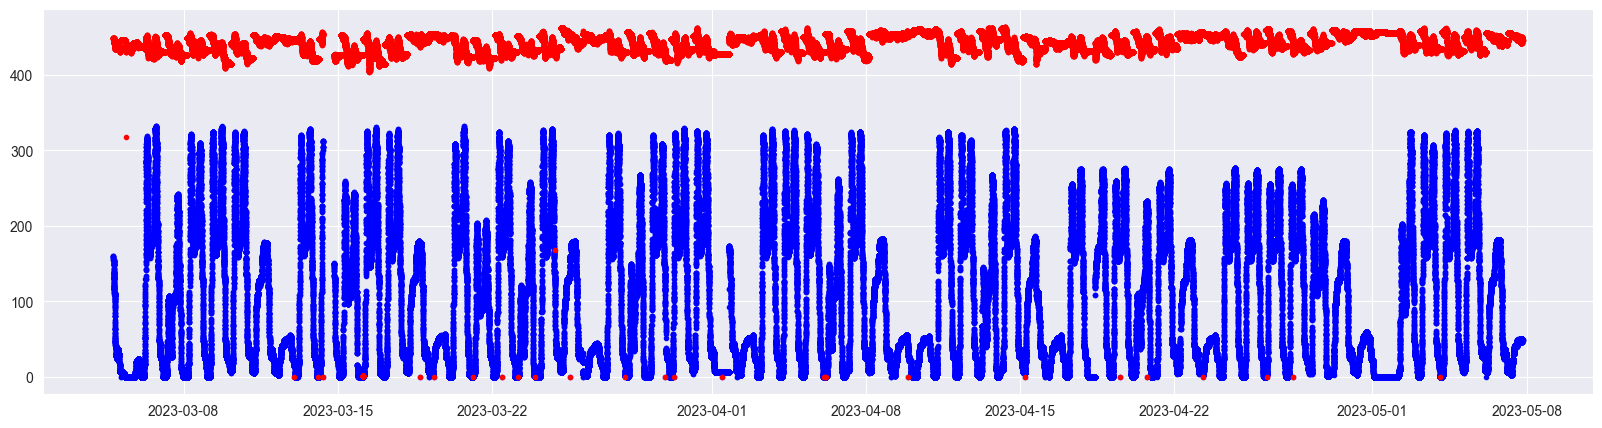

In [18]:
print(df.columns)
# create a graph of the number of buses in operation
x = df['DateEtHeure'].values
y = df['NbBusOp'].values
plt.figure(figsize=(20, 5))
plt.plot(x, y,'.b',label='NbBusOp')

x = df['DateEtHeure'].values
y = df['NbTotalBus'].values
plt.plot(x, y,'.r',label='NbTotalBus')
plt.grid(True)
plt.show()

In [19]:
# print moi le type des colonnes
print(df.dtypes)


DateEtHeure    datetime64[ns]
NbTotalBus              int64
NbBusOp                 int64
dtype: object


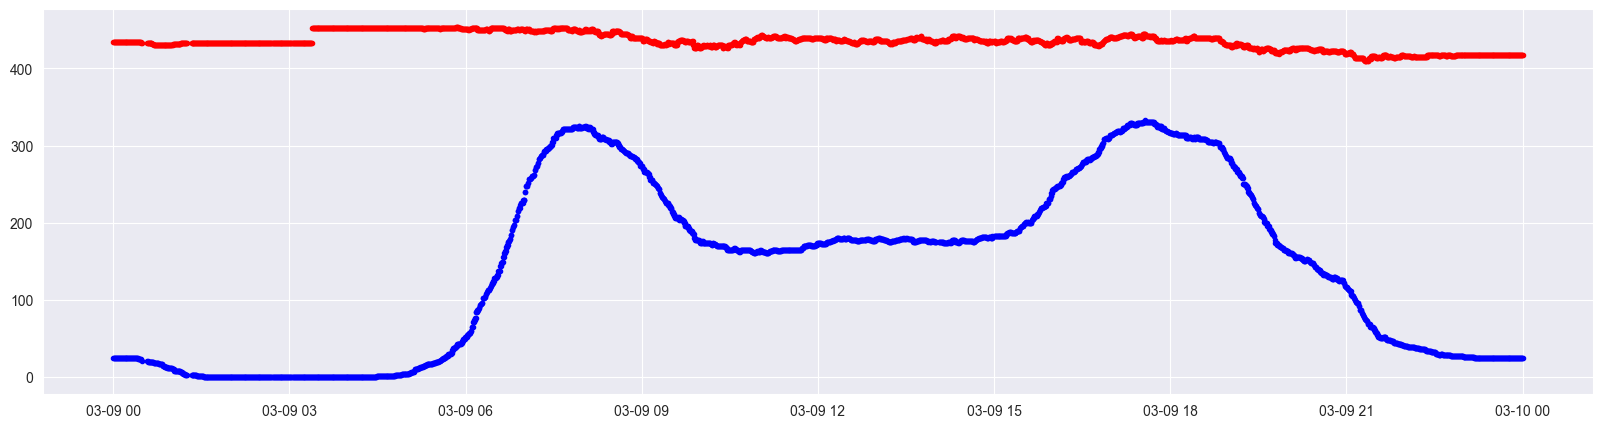

In [20]:
day = 9
month = 3
start_date = pd.Timestamp(f'2023-{month:02}-{day:02} 00:00:00')
end_date = pd.Timestamp(f'2023-03-{day:02} 23:59:59')
df2 = df[(df['DateEtHeure'] >= start_date) & (df['DateEtHeure'] <= end_date)]

x = df2['DateEtHeure'].values
y = df2['NbBusOp'].values
plt.figure(figsize=(20, 5))
plt.plot(x, y,'.b',label='NbBusOp')

x = df2['DateEtHeure'].values
y = df2['NbTotalBus'].values
plt.plot(x, y,'.r',label='NbTotalBus')
plt.grid(True)
plt.show()


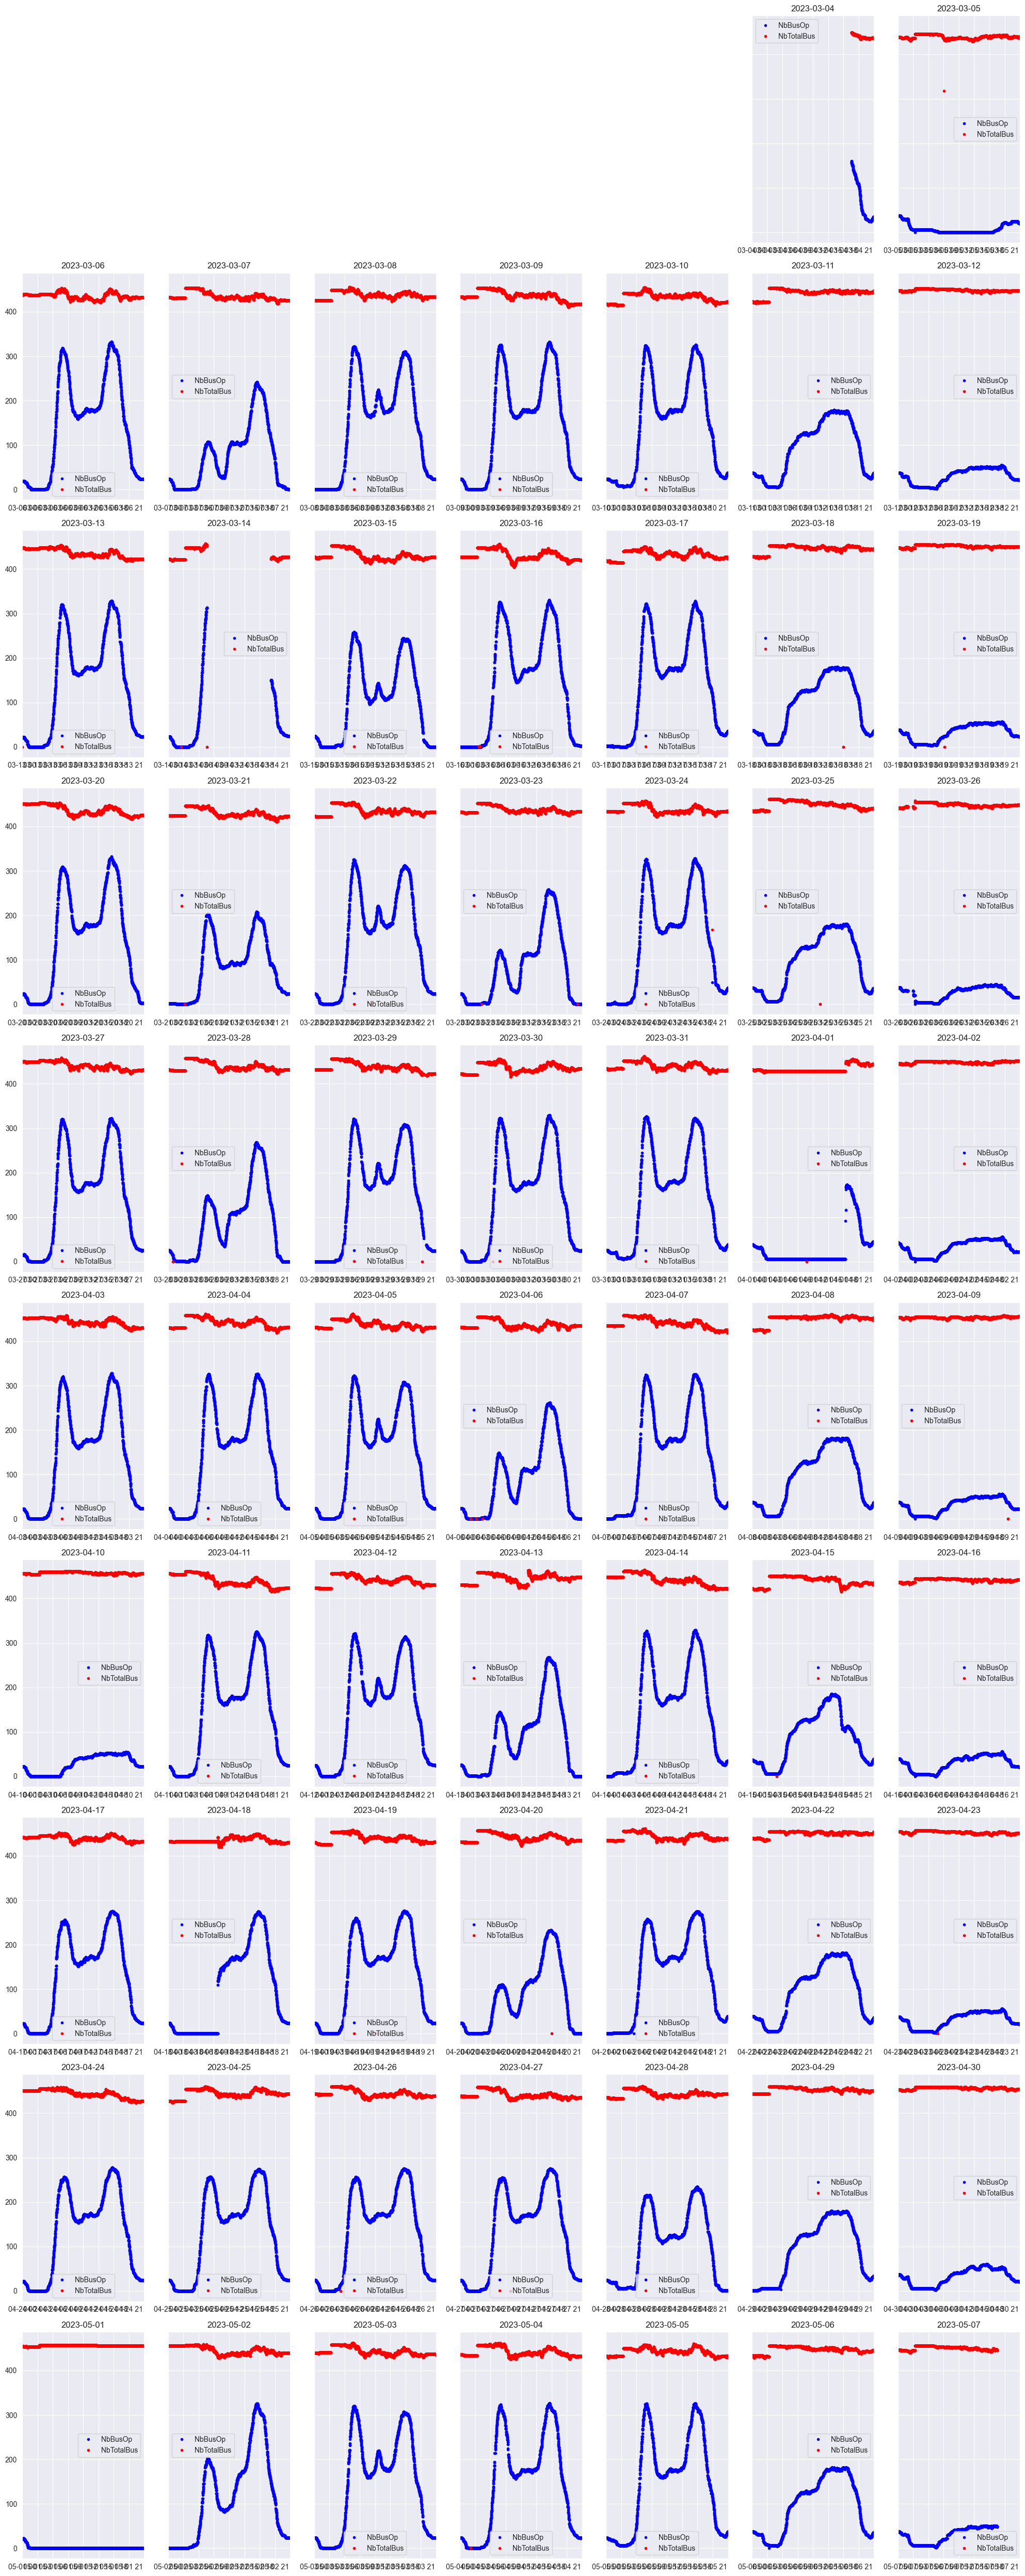

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define your variables here
start_date = pd.Timestamp('2023-03-04 00:00:00')
n_days = 65

# Calculate the end date
end_date = start_date + pd.Timedelta(days=n_days-1)

# Generate a list of dates
dates = pd.date_range(start_date, end_date)

n_days_per_week = 7
first_day_of_week = start_date.weekday()

n_empty_days = first_day_of_week
n_weeks = int(np.ceil((len(dates) + n_empty_days) / n_days_per_week))

fig, axes = plt.subplots(n_weeks, n_days_per_week, figsize=(20, 5 * n_weeks), sharey=True)
axes = axes.flatten()

# Create empty plots for the missing days
for i in range(n_empty_days):
    axes[i].axis('off')

for j, day in enumerate(dates, start=n_empty_days):
    day_start = day
    day_end = day + pd.Timedelta(hours=23, minutes=59, seconds=59)
    df2 = df[(df['DateEtHeure'] >= day_start) & (df['DateEtHeure'] <= day_end)]
    x = df2['DateEtHeure'].values
    y = df2['NbBusOp'].values
    axes[j].plot(x, y, '.b', label='NbBusOp')

    x = df2['DateEtHeure'].values
    y = df2['NbTotalBus'].values
    axes[j].plot(x, y, '.r', label='NbTotalBus')
    axes[j].grid(True)
    axes[j].set_title(day.strftime('%Y-%m-%d'))
    axes[j].legend()

    # Set x-axis limits for each daily graph
    axes[j].set_xlim(day_start, day_end)

# Remove unused subplots and adjust layout
for k in range(j + 1, n_days_per_week * n_weeks):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.show()


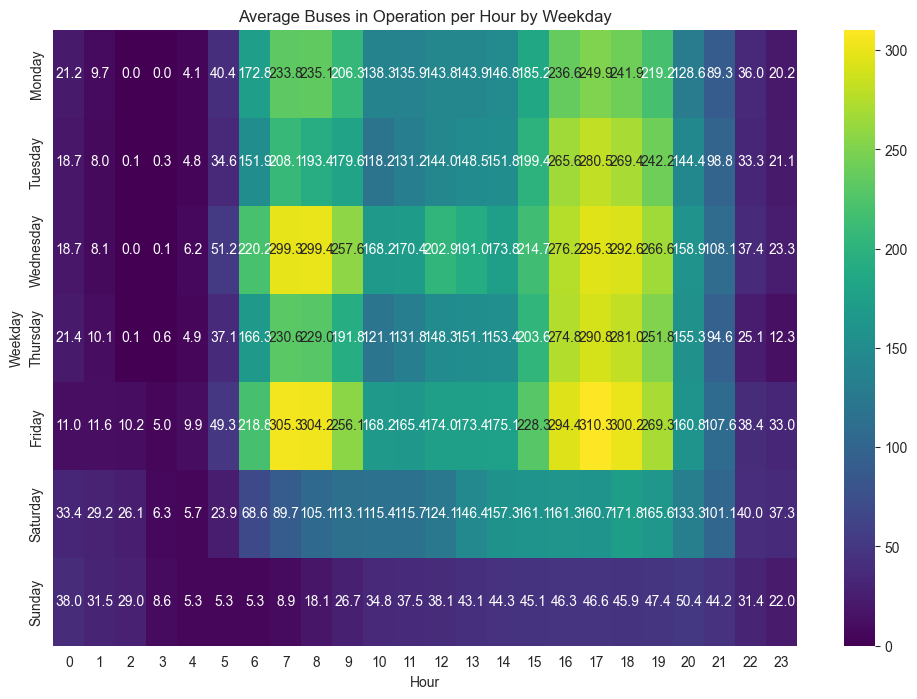

In [28]:
# Resample data to hourly intervals
df_hourly = df.set_index('DateEtHeure').resample('H').max().reset_index()

# Calculate the average number of buses in operation for each hour, grouped by weekdays
df_hourly['Hour'] = df_hourly['DateEtHeure'].dt.hour
df_hourly['Weekday'] = df_hourly['DateEtHeure'].dt.strftime('%A')
avg_buses_per_hour = df_hourly.groupby(['Weekday', 'Hour'])['NbBusOp'].mean().unstack()

# Reorder the index based on the day of the week
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_buses_per_hour = avg_buses_per_hour.reindex(weekdays)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(avg_buses_per_hour, cmap='viridis', annot=True, fmt='.1f')
plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.title('Average Buses in Operation per Hour by Weekday')
plt.show()


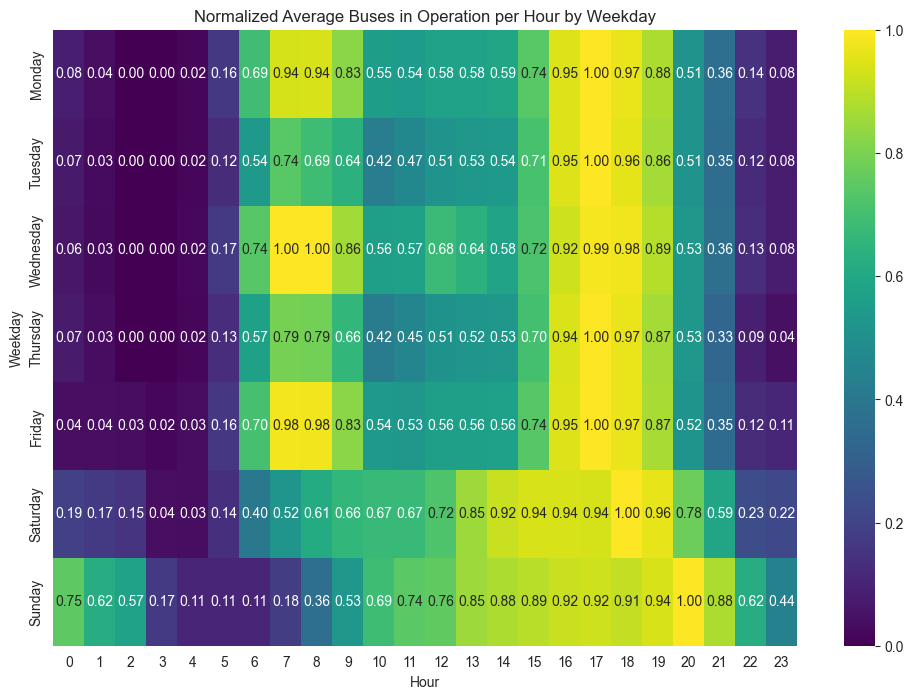

In [29]:
# Resample data to hourly intervals
df_hourly = df.set_index('DateEtHeure').resample('H').max().reset_index()

# Calculate the average number of buses in operation for each hour, grouped by weekdays
df_hourly['Hour'] = df_hourly['DateEtHeure'].dt.hour
df_hourly['Weekday'] = df_hourly['DateEtHeure'].dt.strftime('%A')
avg_buses_per_hour = df_hourly.groupby(['Weekday', 'Hour'])['NbBusOp'].mean().unstack()

# Reorder the index based on the day of the week
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_buses_per_hour = avg_buses_per_hour.reindex(weekdays)

# Normalize the data by dividing each value by the maximum value of each row (i.e., each day)
normalized_buses_per_hour = avg_buses_per_hour.div(avg_buses_per_hour.max(axis=1), axis=0)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_buses_per_hour, cmap='viridis', annot=True, fmt='.2f')
plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.title('Normalized Average Buses in Operation per Hour by Weekday')
plt.show()


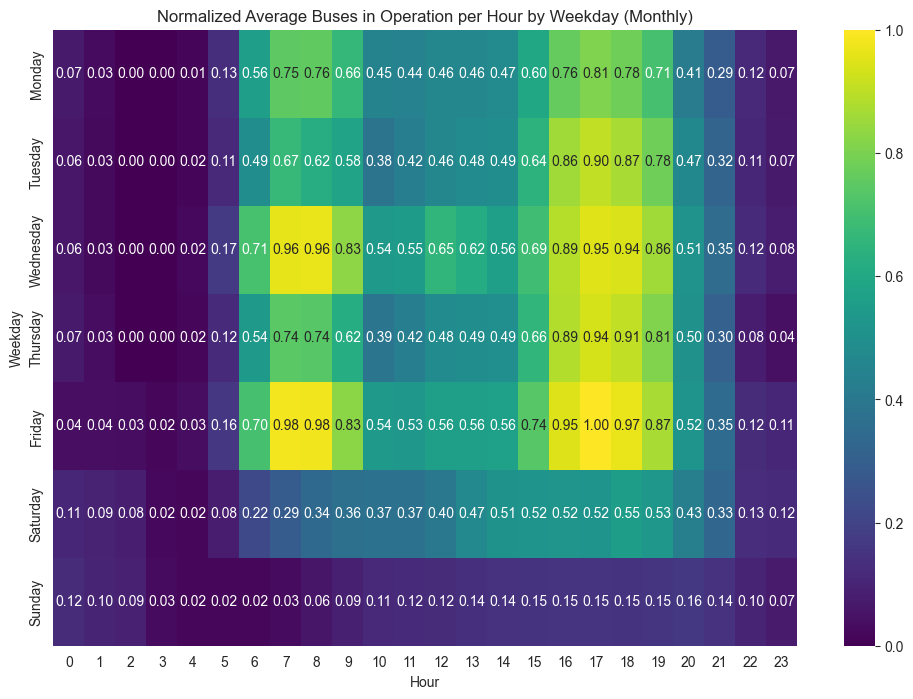

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Resample data to hourly intervals
df_hourly = df.set_index('DateEtHeure').resample('H').max().reset_index()

# Calculate the average number of buses in operation for each hour, grouped by weekdays
df_hourly['Hour'] = df_hourly['DateEtHeure'].dt.hour
df_hourly['Weekday'] = df_hourly['DateEtHeure'].dt.strftime('%A')
avg_buses_per_hour = df_hourly.groupby(['Weekday', 'Hour'])['NbBusOp'].mean().unstack()

# Reorder the index based on the day of the week
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_buses_per_hour = avg_buses_per_hour.reindex(weekdays)

# Normalize the data by dividing each value by the maximum value of the entire DataFrame
max_value = avg_buses_per_hour.max().max()
normalized_buses_per_hour = avg_buses_per_hour / max_value

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_buses_per_hour, cmap='viridis', annot=True, fmt='.2f')
plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.title('Normalized Average Buses in Operation per Hour by Weekday (Monthly)')
plt.show()


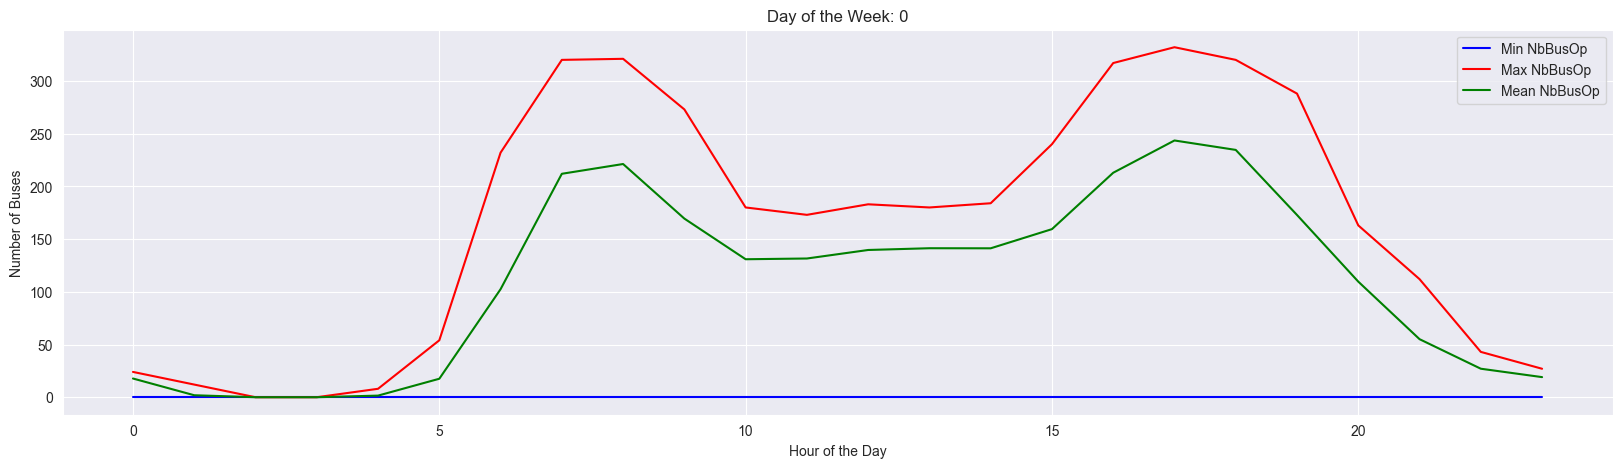

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Select a day of the week to analyze (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
day_of_week = 0  # Monday

# Filter the DataFrame to only have rows with the chosen day of the week
df_filtered = df[df['DateEtHeure'].dt.weekday == day_of_week]

# Group by hours and aggregate min, max, and mean values
hourly_stats = df_filtered.groupby(df_filtered['DateEtHeure'].dt.hour).agg({'NbBusOp': ['min', 'max', 'mean'], 'NbTotalBus': ['min', 'max', 'mean']}).reset_index()

# Plot the min, max, and mean values for 'NbBusOp' and 'NbTotalBus' as a function of hours
plt.figure(figsize=(20, 5))

plt.plot(hourly_stats['DateEtHeure'], hourly_stats['NbBusOp']['min'], '-b', label='Min NbBusOp')
plt.plot(hourly_stats['DateEtHeure'], hourly_stats['NbBusOp']['max'], '-r', label='Max NbBusOp')
plt.plot(hourly_stats['DateEtHeure'], hourly_stats['NbBusOp']['mean'], '-g', label='Mean NbBusOp')


plt.xlabel('Hour of the Day')
plt.ylabel('Number of Buses')
plt.grid(True)
plt.legend()
plt.title(f'Day of the Week: {day_of_week}')

plt.show()


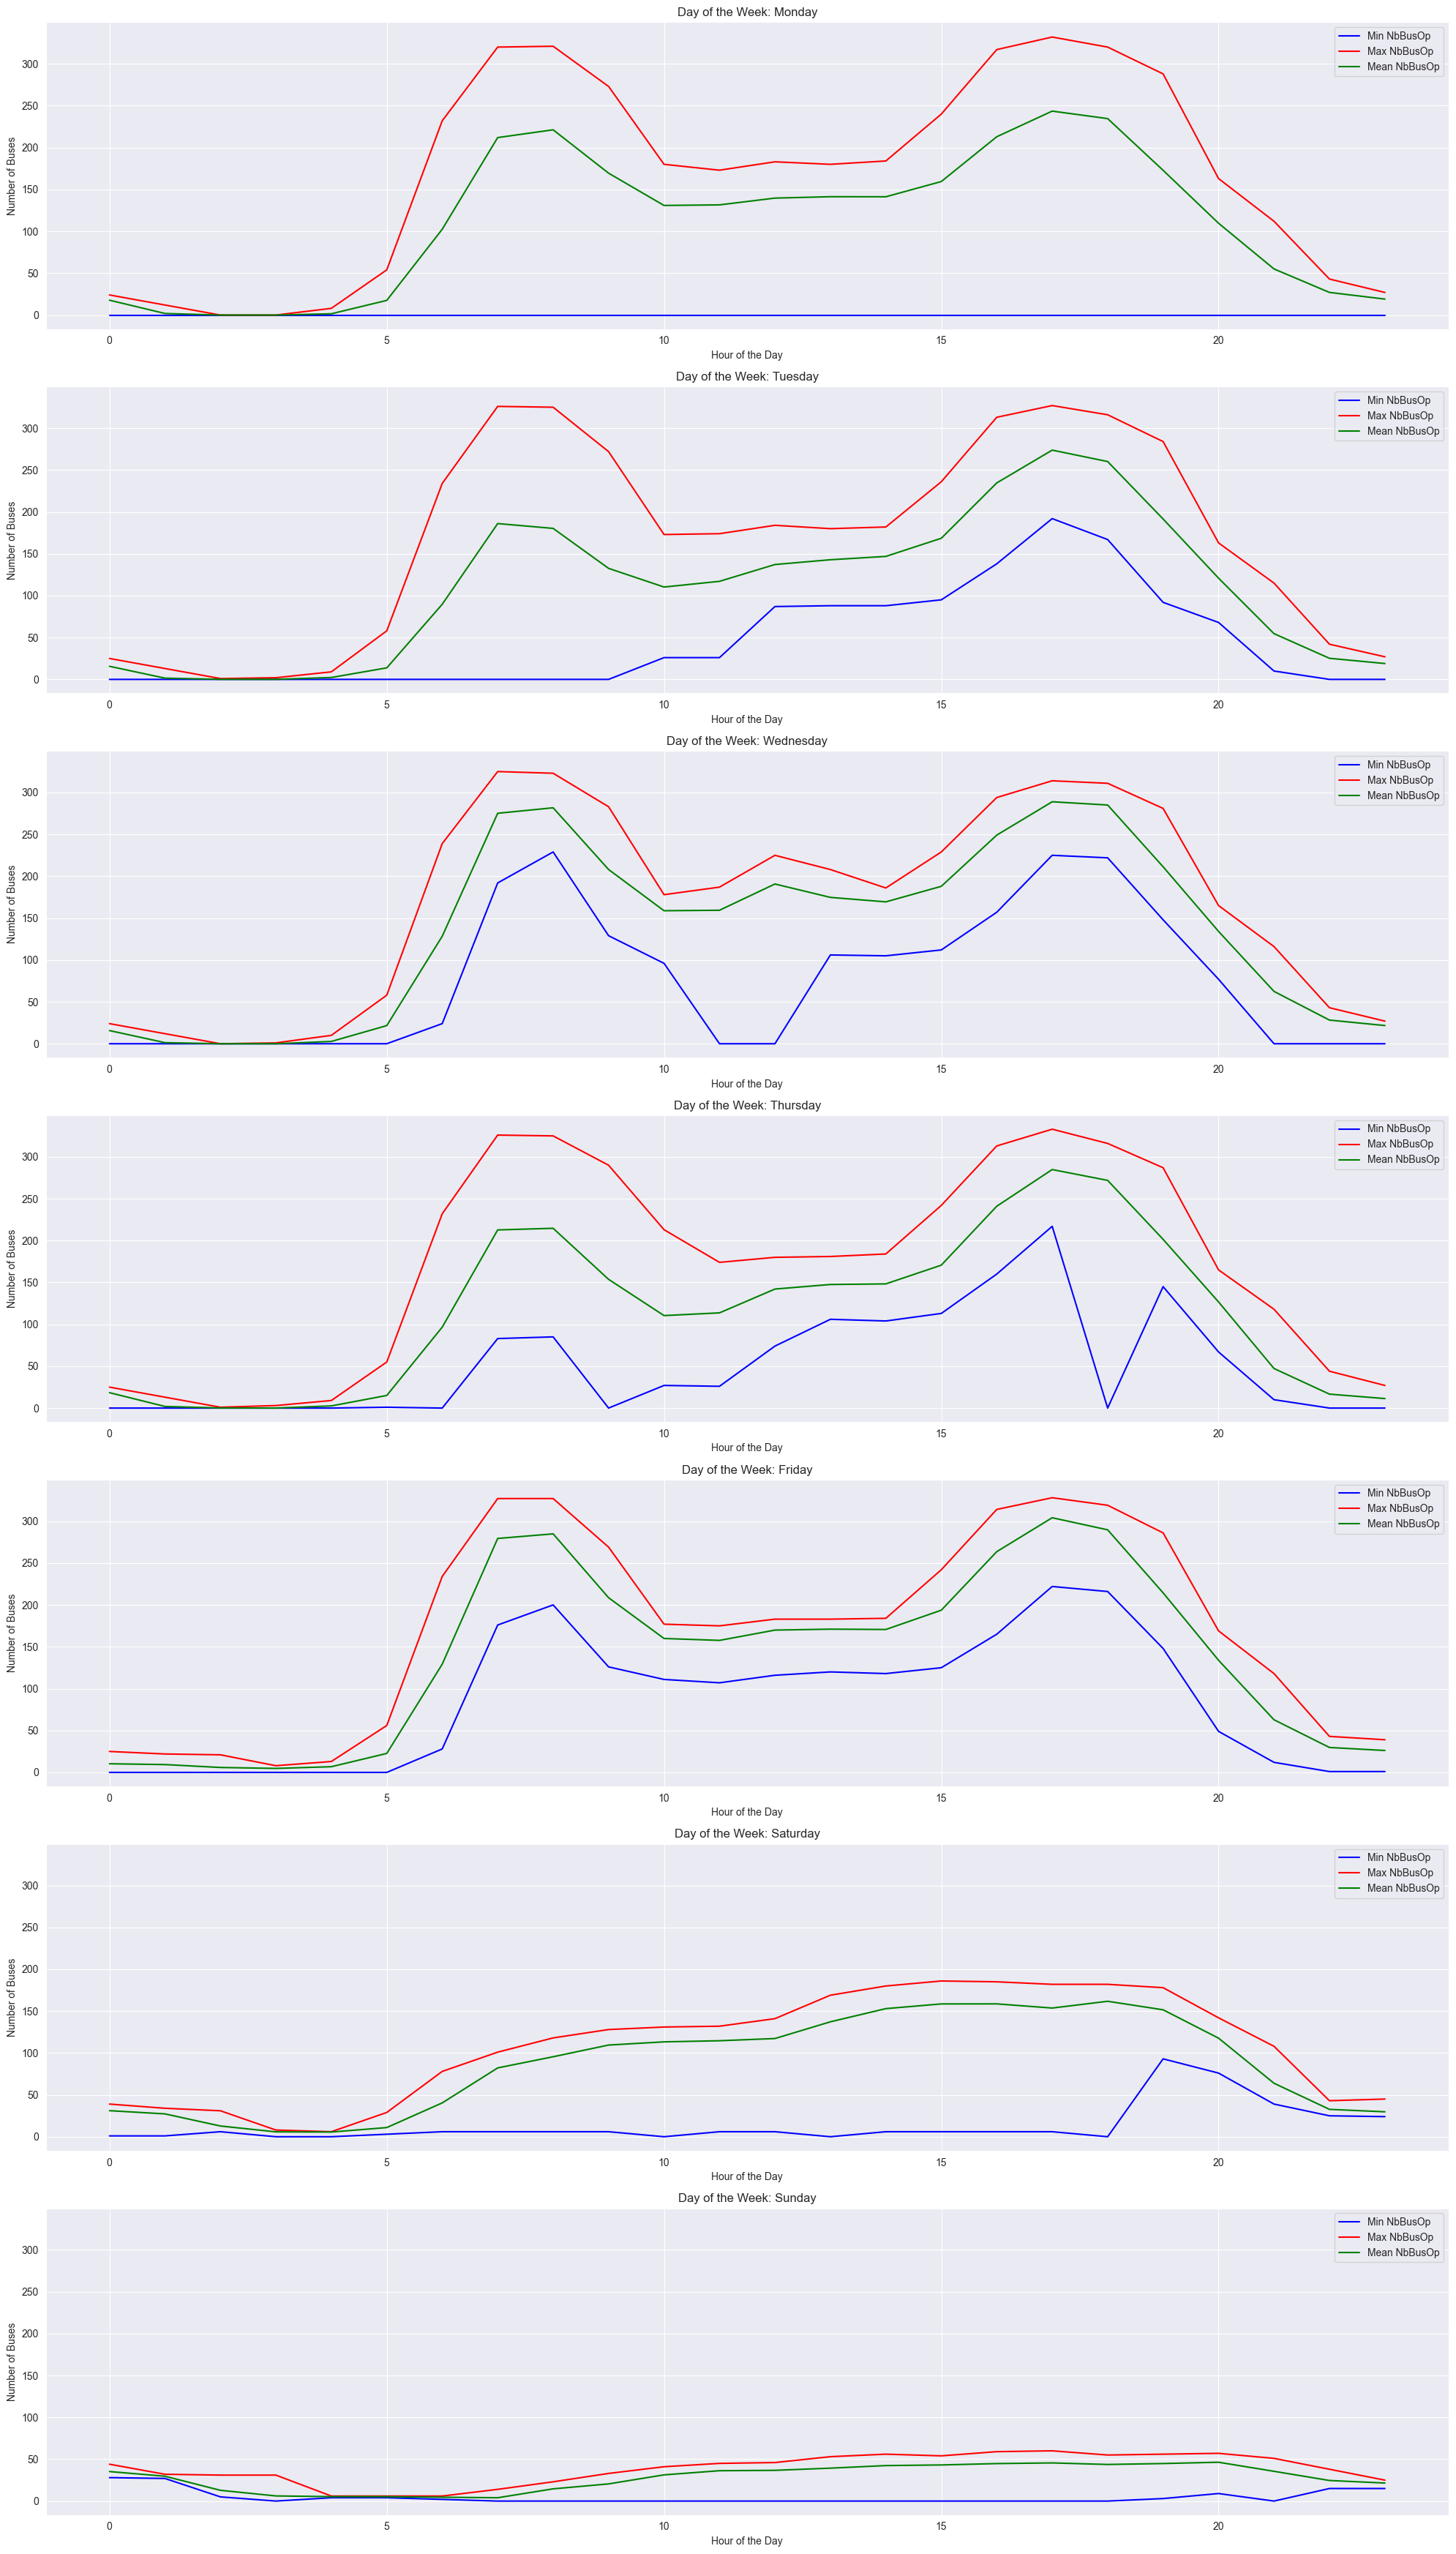

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with columns 'DateEtHeure', 'NbBusOp', and 'NbTotalBus'

def plot_hourly_stats(df, day_of_week, ax):
    df_filtered = df[df['DateEtHeure'].dt.weekday == day_of_week]
    hourly_stats = df_filtered.groupby(df_filtered['DateEtHeure'].dt.hour).agg({'NbBusOp': ['min', 'max', 'mean'], 'NbTotalBus': ['min', 'max', 'mean']}).reset_index()

    ax.plot(hourly_stats['DateEtHeure'], hourly_stats['NbBusOp']['min'], '-b', label='Min NbBusOp')
    ax.plot(hourly_stats['DateEtHeure'], hourly_stats['NbBusOp']['max'], '-r', label='Max NbBusOp')
    ax.plot(hourly_stats['DateEtHeure'], hourly_stats['NbBusOp']['mean'], '-g', label='Mean NbBusOp')


    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Number of Buses')
    ax.grid(True)
    ax.legend()
    ax.set_title(f'Day of the Week: {day_of_week}')

fig, axes = plt.subplots(7, 1, figsize=(20, 35), sharey=True)

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i in range(7):
    plot_hourly_stats(df, i, axes[i])
    axes[i].set_title(f'Day of the Week: {days[i]}')

plt.tight_layout()
plt.show()
